<a href="https://www.kaggle.com/code/faizulislam19095/lung-cancer-prediction-eda-smote-modeling?scriptVersionId=191369503" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="background-color:#000; color:white; padding:15px; font-size:40px; font-family: sans-serif; text-align:center; border-radius:50px;">Introduction</div>


**Welcome.Happy to see you here.So this work is based on lung cancer prediction.**

**Lung cancer represents a formidable global health challenge, characterized by the development of malignant tumors within lung tissues. It is a matter of significant concern due to its severity and global prevalence. Lung cancer is a leading cause of cancer-related deaths worldwide, impacting individuals across various demographics.The severity of lung cancer stems from its aggressive nature and the challenges associated with its diagnosis and treatment.**

<div style="background-color:#ffcc00; color:#333; padding:20px; font-size:24px; font-weight:bold; text-align:left; border-radius:70px;"> 
    If you found this notebook helpful, please consider UPVOTING. This will inspire me on this learning journey! 
</div>


**Table of Contents**

[Problem Statement](#1)

[Lung Cancer risk factors - Vital Queries](#2)

[Data Preprocessing](#3)

[Diving deep into the dataset](#4)

[Distribution of the target](#5)

[Exploring the associated variables](#6)

[Handling Imbalanced Data](#7)

[Modeling (Logistic Regression,Random Forest,SVM,KNN,XGBoost)](#8)

[Findings/Insights](#9)

<a id="1"></a> <br>

# <div style="background-color:#000; color:cyan; padding:15px; font-size:25px; font-family: sans-serif; text-align:left; border-radius:20px;">Problem Statement</div>


**We intend to develop a comprehensive predictive model for lung cancer risk assesment using a dataset enriched with a wide array of patient attributes,including gender,age,smoking history,and a spectrum of health-related indicators.**

<a id="2"></a> <br>

# <div style="background-color:#000; color:cyan; padding:15px; font-size:25px; font-family: sans-serif; text-align:left; border-radius:20px;">Lung Cancer risk factors - Vital Queries</div>


<div style = 'border : 3px solid lightblue; background-color:#EBDEF0;color:black;padding:10px'>

**Gender Influence**: To what extent does gender impact the likelihood of developing lung cancer, and are there notable gender-based disparities?

**Age-Related Risk**: How does age factor into the risk of lung cancer, and is there a particular age group more vulnerable?

**Smoking History**: How does a history of smoking relate to the risk of lung cancer, and is there a straightforward connection?

**Yellow Fingers**: Does the presence of yellow fingers, possibly due to nicotine staining, correlate with an elevated risk of lung cancer?

**Anxiety Impact**: Is there a connection between anxiety levels and the likelihood of developing lung cancer?

**Peer Pressure Influence**: How does exposure to peer pressure, especially related to smoking, affect the risk of lung cancer?

**Chronic Diseases**: Are individuals with chronic diseases at a higher risk of developing lung cancer?

**Fatigue and Risk**: Does chronic fatigue or tiredness play a role in lung cancer risk?

**Allergies and Susceptibility**: Is there a correlation between allergies and an increased risk of lung cancer?

**Wheezing Connection**: How strong is the association between wheezing and the likelihood of developing lung cancer?

**Alcohol Impact**: Do patterns of alcohol consumption influence lung cancer risk?

**Coughing and Risk**: Is there a significant relationship between chronic coughing and lung cancer risk?

**Respiratory and Swallowing Factors**: "How do symptoms like shortness of breath and difficulty in swallowing relate to the risk of lung cancer?"

**Assessing Chest Pain** :How is chest pain related to the risk of developing lung cancer?


# <div style="background-color:#000; color:cyan; padding:15px; font-size:25px; font-family: sans-serif; text-align:left; border-radius:20px;">Necessary Libraries & Utilities</div>




In [1]:
import warnings 
warnings.filterwarnings('ignore')
import os
import numpy as np
import pandas as pd
import re
import string
from collections import Counter
import time
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
!pip install pywaffle
from pywaffle import Waffle
%matplotlib inline
init_notebook_mode(connected= True)
from sklearn.preprocessing import (StandardScaler,
                                   LabelEncoder,
                                   OneHotEncoder)
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, 
                             auc, 
                             precision_score,
                             recall_score,
                             f1_score, 
                             roc_auc_score,
                             confusion_matrix)
from sklearn.model_selection import (GridSearchCV,
                                     StratifiedKFold,
                                     cross_val_score)

from sklearn.decomposition import PCA
from umap import UMAP
import pylab as pl
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import (RandomUnderSampler, 
                                     ClusterCentroids,
                                     TomekLinks,
                                     NeighbourhoodCleaningRule,
                                     EditedNearestNeighbours,
                                     NearMiss)
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import (SMOTE,
                                    ADASYN)
from sklearn.ensemble import (RandomForestClassifier, 
                              AdaBoostClassifier, 
                              GradientBoostingClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 40.0 MB/s eta 0:00:00


<a id="3"></a> <br>

# <div style="background-color:#000; color:white; padding:15px; font-size:40px; font-family: sans-serif; text-align:center; border-radius:20px;">Data Preprocessing</div>


In [2]:
df = pd.read_csv("/kaggle/input/lung-cancer/survey lung cancer.csv")
df.head().T

,0,1,2,3,4
GENDER,M,M,F,M,F
AGE,69,74,59,63,63
SMOKING,1,2,1,2,1
YELLOW_FINGERS,2,1,1,2,2
ANXIETY,2,1,1,2,1
PEER_PRESSURE,1,1,2,1,1
CHRONIC DISEASE,1,2,1,1,1
FATIGUE,2,2,2,1,1
ALLERGY,1,2,1,1,1
WHEEZING,2,1,2,1,2


* **GENDER:** The individual's gender, whether male or female (M/F)
* **AGE:** The person's age in years
* **SMOKING:** A binary indicator of smoking history (Yes=2/No=1)
* **YELLOW FINGERS:** Presence of yellowing of fingers (Yes=2/No=1)
* **ANXIETY:** Presence of anxiety issues (Yes=2/No=1)
* **PEER_PRESSURE:** Exposure to peer pressure (Yes=2/No=1)
* **CHRONIC DISEASE:** Presence of chronic diseases (Yes=2/No=1)
* **FATIGUE:** Presence of chronic tiredness or fatigue (Yes=2/No=1)
* **ALLERGY:** Presence of allergies (Yes=2/No=1)
* **WHEEZING:** Occurrence of wheezing (Yes=2/No=1)
* **ALCOHOL:** Alcohol consumption (Yes=2/No=1)
* **COUGHING:** Presence of chronic coughing (Yes=2/No=1)
* **SHORTNESS OF BREATH:** Experience of shortness of breath (Yes=2/No=1)
* **SWALLOWING DIFFICULTY:** Difficulty in swallowing (Yes=2/No=1)
* **CHEST PAIN:** Presence of chest pain (Yes=2/No=1)
* **LUNG_CANCER:** Has Lung Cancer or not (YES/NO)


**Categorical variables**

* GENDER
* SMOKING
* YELLOW FINGERS
* ANXIETY
* PEER PRESSURE
* CHRONIC DISEASE
* FATIGUE
* ALLERGY
* WHEEZING
* ALCOHOL CONSUMING
* COUGHING
* SHORTNESS OF BREATH
* SWALLOWING DIFFICULTY
* CHEST PAIN
* HEART STROKE
 
**Continuous variable**

* AGE

**In order to improve dataset readability and maintain consistency, I will implement the following modifications in the existing dataset:**

* Convert all column names to lowercase.

* Add underscores ('_') between multi-word column names.

* Update the coding for 'Yes' to 1 and 'No' to 0 to maintain consistency."

In [3]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')


In [4]:
columns_to_replace = ['smoking', 'yellow_fingers', 'anxiety', 'peer_pressure', 'chronic_disease', 'fatigue',
                       'allergy', 'wheezing', 'alcohol_consuming', 'coughing', 'shortness_of_breath', 'swallowing_difficulty',
                       'chest_pain', 'lung_cancer']
replacement_mapping = {1: 0, 2: 1}
df[columns_to_replace] = df[columns_to_replace].replace(replacement_mapping)
df['lung_cancer'] = df['lung_cancer'].replace({"YES":1,"NO":0})

<a id="4"></a> <br>

# <div style="background-color:#000; color:cyan; padding:15px; font-size:25px; font-family: sans-serif; text-align:left; border-radius:20px;">Diving deep into the Dataset
</div>


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   gender                 309 non-null    object
 1   age                    309 non-null    int64 
 2   smoking                309 non-null    int64 
 3   yellow_fingers         309 non-null    int64 
 4   anxiety                309 non-null    int64 
 5   peer_pressure          309 non-null    int64 
 6   chronic_disease        309 non-null    int64 
 7   fatigue                309 non-null    int64 
 8   allergy                309 non-null    int64 
 9   wheezing               309 non-null    int64 
 10  alcohol_consuming      309 non-null    int64 
 11  coughing               309 non-null    int64 
 12  shortness_of_breath    309 non-null    int64 
 13  swallowing_difficulty  309 non-null    int64 
 14  chest_pain             309 non-null    int64 
 15  lung_cancer            

In [6]:
df.shape

(309, 16)

**That means there are total 309 rows and 16 columns in our dataset**

In [7]:
df.duplicated().sum()

33

**There are total 33 duplicated rows, so we will remove those because duplicate values in a dataset can distort analysis,waste storage space and hinder data accuracy and performance**

In [8]:
df = df.drop_duplicates()
df.shape

(276, 16)

**And now we have 276 rows and 16 columns in our dataset.**

In [9]:
df.isnull().sum()

gender                   0
age                      0
smoking                  0
yellow_fingers           0
anxiety                  0
peer_pressure            0
chronic_disease          0
fatigue                  0
allergy                  0
wheezing                 0
alcohol_consuming        0
coughing                 0
shortness_of_breath      0
swallowing_difficulty    0
chest_pain               0
lung_cancer              0
dtype: int64

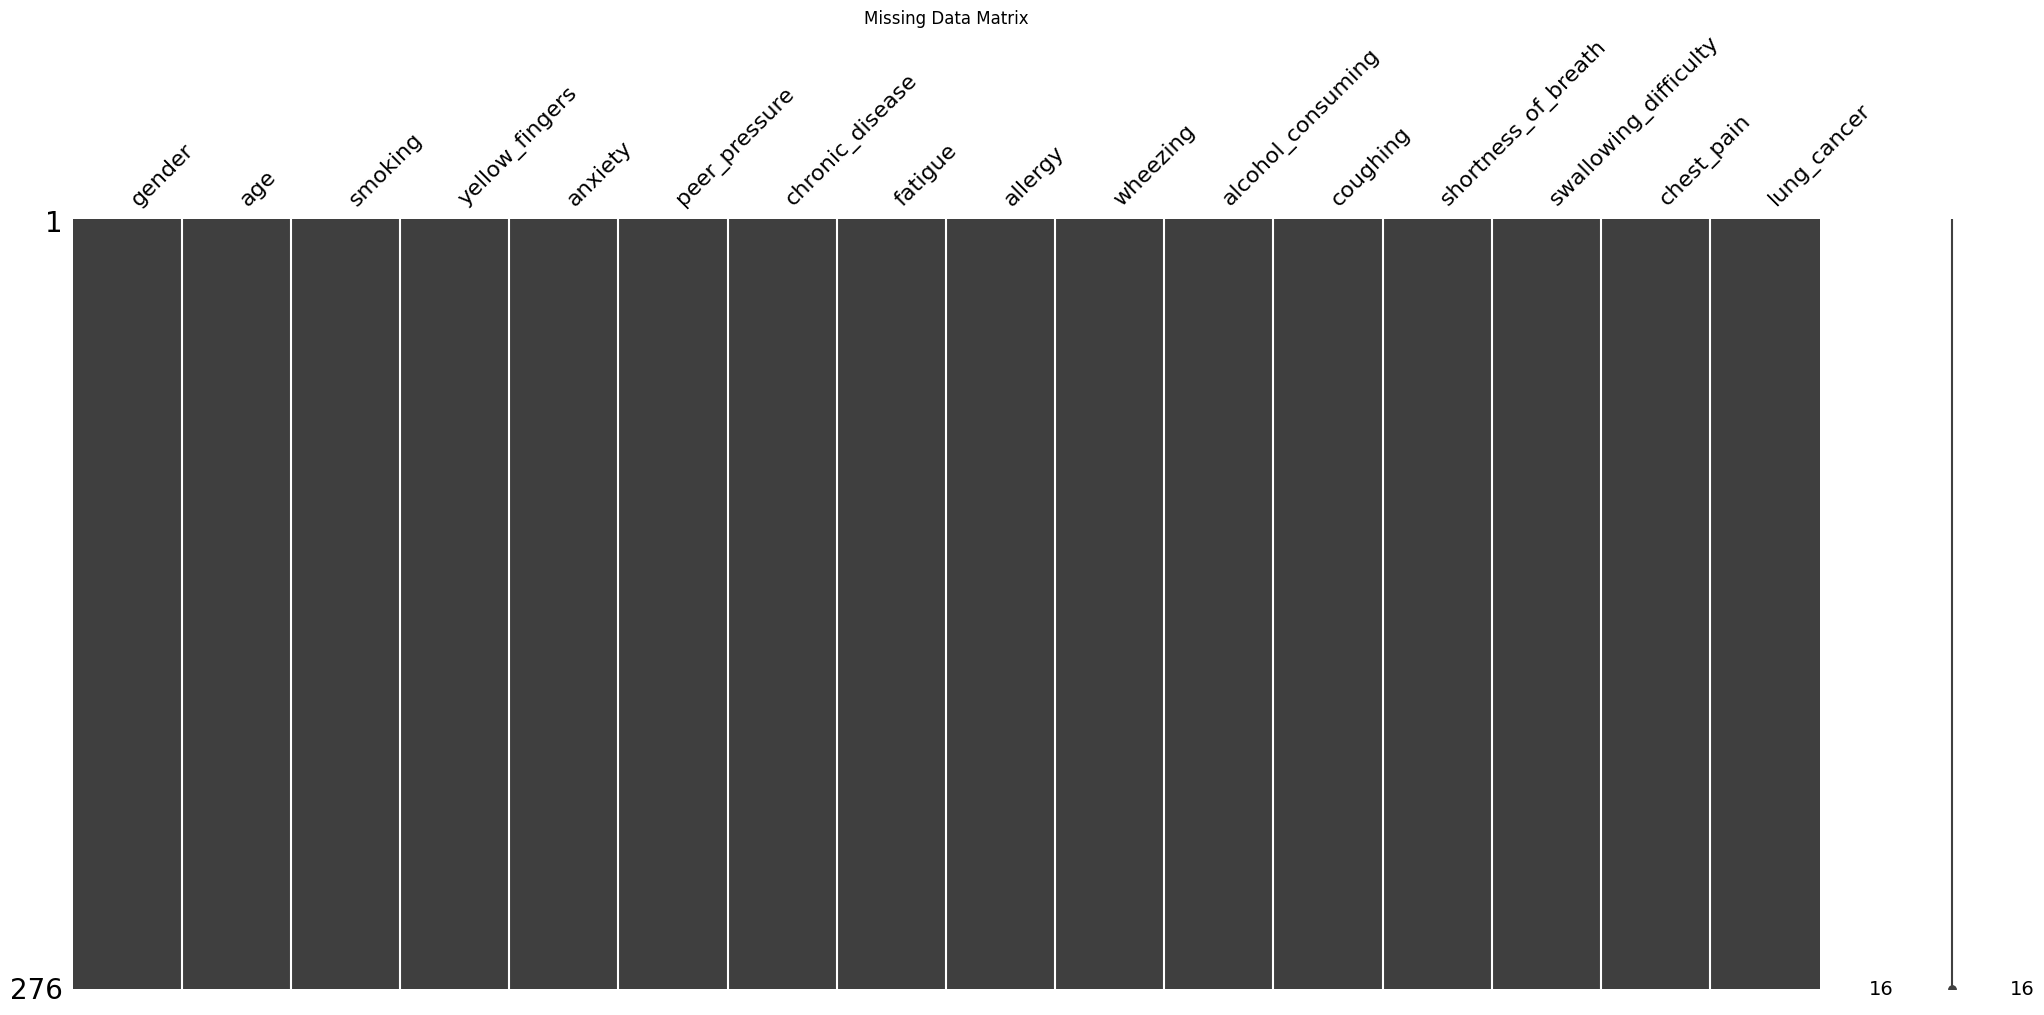

In [10]:
msno.matrix(df)
plt.title("Missing Data Matrix")
plt.show()


**As we can see there is no missing values detected across any of its columns**

In [11]:
# Statistical summary of the only continuous variable(age) 

df['age'].describe()

count    276.000000
mean      62.909420
std        8.379355
min       21.000000
25%       57.750000
50%       62.500000
75%       69.000000
max       87.000000
Name: age, dtype: float64

In [12]:
df['gender'] = df['gender'].replace({"M":1,"F":2})

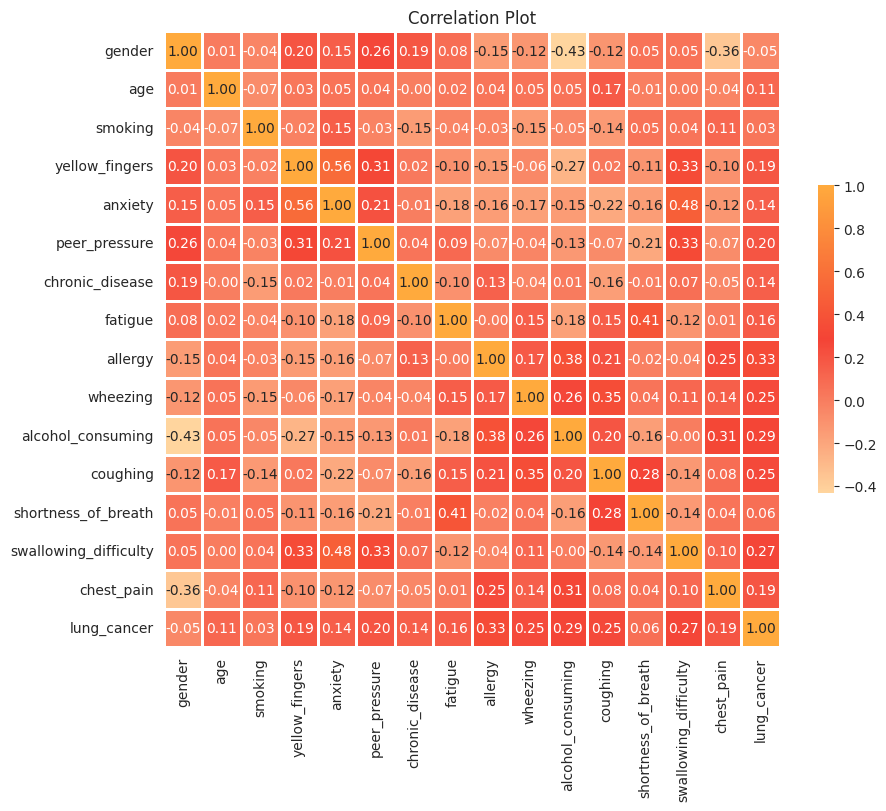

In [13]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
colors = ['#ffd59e', '#f44336', '#ffaa3d']  
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=colormap,
            cbar_kws={"shrink": .5}, square=True,
            linewidths=1, linecolor='white')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Correlation Plot")
plt.show()


<a id="5"></a> <br>

# <div style="background-color:#000; color:cyan; padding:15px; font-size:25px; font-family: sans-serif; text-align:left; border-radius:20px;">Distribution of the target
# </div>

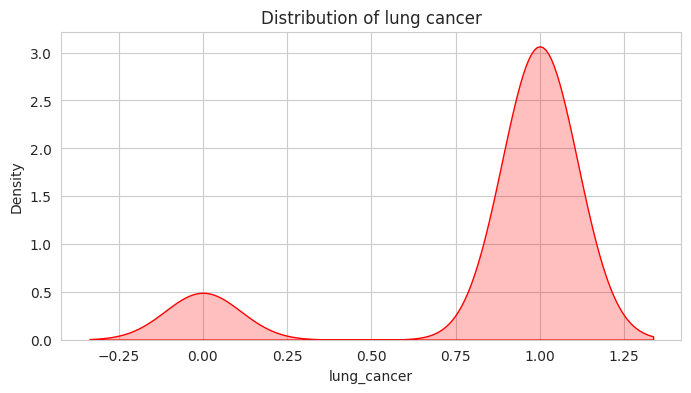

In [14]:
plt.figure(figsize=(8,4))
sns.kdeplot(data=df,x='lung_cancer',shade=True,fill=True,color='red')
plt.title('Distribution of lung cancer')
plt.show()

In [15]:
df_plot = df.copy()
df_plot['lung_cancer'] = df_plot['lung_cancer'].replace({0: 'No', 1: 'Yes'})
fig = px.histogram(df_plot, x='lung_cancer', color='lung_cancer',
                   color_discrete_map={'No': '#a3a3ec', 'Yes': '#ff9f9f'},
                   labels={'lung_cancer': 'Lung Cancer'},
                   title='Distribution of Lung Cancer')
fig.update_xaxes(categoryorder='array', categoryarray=['Yes', 'No'])
total_counts = df_plot['lung_cancer'].count()
for i in range(2):
    count = df_plot[df_plot['lung_cancer'] == ['Yes', 'No'][i]]['lung_cancer'].count()
    percentage = count / total_counts * 100
    fig.add_annotation(
        x=['Yes', 'No'][i], y=count + 15,
        text=f'{percentage:.2f}%',
        showarrow=False,
        font=dict(family='sarif',size=12, color='black')
    )
fig.show()


<div style="background-color:#FAF2D3; color:black; padding:20px; font-size:15px; text-align:left; border-radius:20px;"> 
Interpretation : Within our dataset,we have examined the distribution of lung cancer among individuals.It is evident from the histogram that a substantial majority,roughly 87.23% of the individuals have lung cancer.This impies that out of every 100 individuals,approximately 87 are affected from this condition. In contrast,only about 13.77% people in this dataset are free from lung cancer.This stark difference underscores the imbalanced nature of the dataset.
</div>


<a id="6"></a> <br>

# <div style="background-color:#000; color:cyan; padding:15px; font-size:25px; font-family: sans-serif; text-align:left; border-radius:20px;">Exploring the associated variables
# </div>

<a id="A"></a> <br>

# <div style="background-color:gray; color:white; padding:15px; font-size:25px; font-family: sans-serif; text-align:left; border-radius:20px;">Age & Lung cancer
</div>


In [16]:
# Binning the age column
df['age_cat'] = pd.cut(df['age'],bins=[0,13,18,45,60,130],labels=['Children','Teens','Adults','Mid Adults','Elderly'])

In [17]:
# cross-tabulation

df.groupby(['age_cat','lung_cancer']).size().unstack(fill_value=0)

lung_cancer,0,1
age_cat,,
Children,0,0
Teens,0,0
Adults,1,4
Mid Adults,18,85
Elderly,19,149


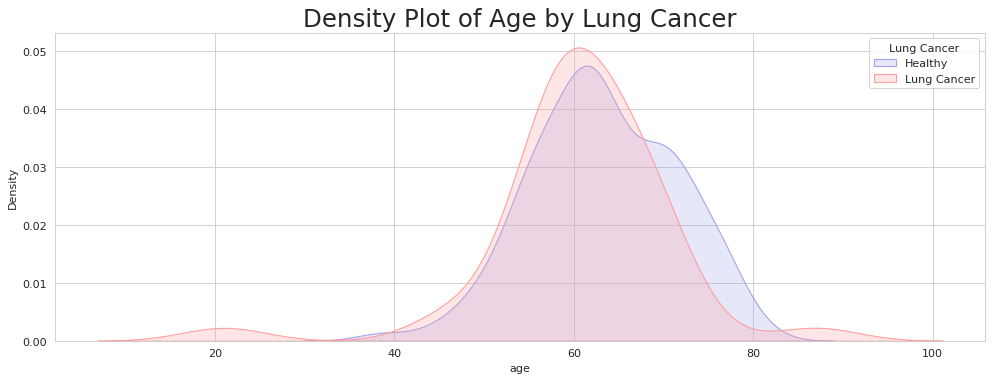

In [18]:
plt.figure(figsize=(15,5),dpi=80)
sns.kdeplot(data=df,x='age',hue="lung_cancer",shade=True,common_norm=False,palette=['#ff9f9f','#a3a3ec'])
plt.title('Density Plot of Age by Lung Cancer',fontsize=22)
plt.legend(title='Lung Cancer',loc = 'upper right',labels=['Healthy','Lung Cancer'])
plt.show()
fig = px.violin(df, x='lung_cancer', y='age', box=True, points='all',
                title='Age Distribution by Lung Cancer (Violin & Swarm)',
                color='lung_cancer',
                category_orders={'lung_cancer': ['Yes', 'No']},  
                labels={'age': 'Age', 'lung_cancer': 'Lung Cancer'},
                color_discrete_sequence=['#ff9f9f', '#a3a3ec']) 
fig.update_layout(
    xaxis_title='Lung Cancer',
    yaxis_title='Age',
    legend_title='Lung Cancer',
    showlegend=True
)

fig.show()




<div style="background-color:gray; color:white; padding:15px; font-size:25px; font-family: sans-serif; text-align:left; border-radius:20px;">Gender & Lung cancer
</div>


In [19]:
df_plot = df.copy()
df_plot['gender'] = df_plot['gender'].replace({1:"Male",2:"Female"})
fig = px.histogram(df_plot,x='gender',color='gender',color_discrete_map={"Male":"#f59542",'Female':"#f4e78b"},
                  labels={'gender':'Gender'},title="Distribution of Gender")
fig.update_xaxes(categoryorder='array',categoryarray=['Male','Female'])
fig.show()

<Figure size 640x480 with 0 Axes>

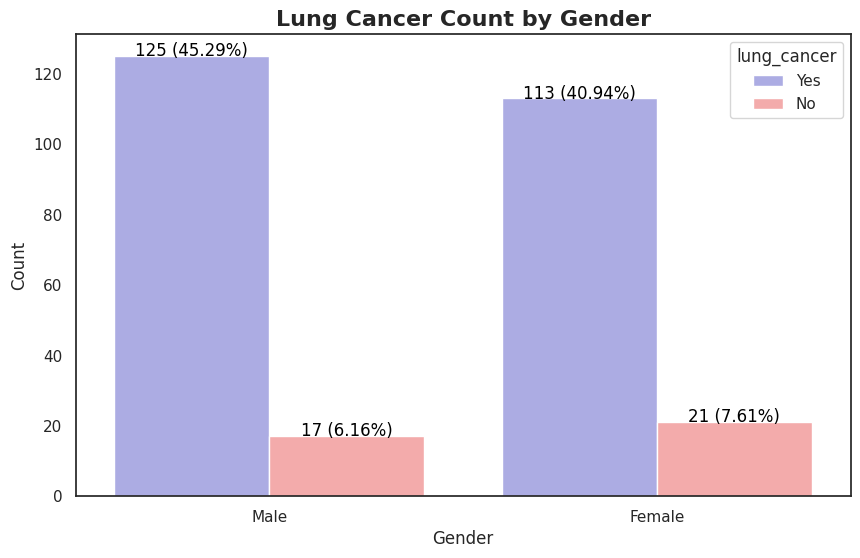

In [20]:
df_plot = df.copy()
df_plot['gender'] = df_plot['gender'].replace({1:"Male",2:"Female"})
df_plot['lung_cancer'] = df_plot['lung_cancer'].replace({0:"No",1:"Yes"})
sns.set(style="whitegrid")
sns.set_style("white")
sns.despine()
palette = [ '#a3a3ec','#ff9f9f']
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_plot, x='gender', hue='lung_cancer', palette=palette)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Lung Cancer Count by Gender", fontsize=16, fontweight='bold')

total_counts = len(df)

for p in ax.patches:
    count = int(p.get_height())
    percentage = f"{100 * count / total_counts:.2f}%"
    ax.annotate(f'{count} ({percentage})', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black')

plt.show()


In [21]:
df_copy = df.copy()
df_copy['gender'] = df_copy['gender'].replace({1: "Male", 2: "Female"})
df_copy['smoking'] = pd.to_numeric(df_copy['smoking'])
df_copy['lung_cancer'] = pd.to_numeric(df_copy['lung_cancer'])
male_total = len(df_copy[df_copy['gender'] == "Male"])
female_total = len(df_copy[df_copy['gender'] == "Female"])
male_smk_lc = len(df_copy[(df_copy['gender'] == "Male") & (df_copy['lung_cancer'] == 1) & (df_copy['smoking'] == 1)])
female_smk_lc = len(df_copy[(df_copy['gender'] == "Female") & (df_copy['lung_cancer'] == 1) & (df_copy['smoking'] == 1)])
data = {
    'Gender': ['Male', 'Female'],
    'Total Population': [male_total, female_total],
    'Smoking & Lung Cancer': [male_smk_lc, female_smk_lc],
    'Non-smoking & Lung Cancer': [male_total - male_smk_lc, female_total - female_smk_lc]
}
df_plot = pd.DataFrame(data)
fig = px.bar(df_plot, x='Gender', y=['Total Population', 'Smoking & Lung Cancer', 'Non-smoking & Lung Cancer'],
             title='Population and Lung Cancer Cases by Gender and Smoking',
             labels={'value': 'Count', 'variable': 'Category'},
             color_discrete_sequence=['#a3a3ec', '#ff9f9f', '#ffcccb'])
fig.update_layout(barmode='group')
fig.show()


In [22]:
male_percentage = (len(df[(df['gender'] == 1) & (df['lung_cancer'] == 1)]) / len(df[df['gender'] == 1])) * 100
female_percentage = (len(df[(df['gender'] == 2) & (df['lung_cancer'] == 1)]) / len(df[df['gender'] == 2])) * 100
gender_data = pd.DataFrame({'Gender': ['Male', 'Female'], 'Percentage': [male_percentage, female_percentage]})
gender_data['Text'] = gender_data['Percentage'].apply(lambda x: f'{x:.1f}%')
colors = {'Male': '#f59542', 'Female': '#f4e78b'}
fig = px.bar(gender_data, x='Percentage', y='Gender', orientation='h', color='Gender', text='Text', color_discrete_map=colors)
fig.update_layout(
    title='Percentage of Lung Cancer Cases by Gender',
    xaxis_title='Percentage',
    yaxis_title='Gender',
    showlegend=False
)
fig.show()



<div style="background-color:#FAF2D3; color:black; padding:20px; font-size:15px; text-align:left; border-radius:20px;"> 
Interpretation : 
it's evident that lung cancer affects a significant proportion of both males and females. However, it's worth noting that approximately 88% of males in the dataset have been diagnosed with lung cancer, while 84% of females have the same diagnosis. These percentages suggest that in this dataset males are affected by lung cancer more than females, emphasizing a higher prevalence of this condition in the male population. 
</div>


<div style="background-color:gray; color:white; padding:15px; font-size:25px; font-family: sans-serif; text-align:left; border-radius:20px;">Smoking & Lung cancer
</div>


In [23]:
df_plot = df.copy()
df_plot['smoking'] = df_plot['smoking'].replace({1:"Yes",0:"No"})
fig = px.histogram(df_plot, x='smoking', color='smoking',
                   color_discrete_sequence={1: '#f59542', 0: '#f4e78b'},
                   labels={'smoking': 'Smoking'},
                   title='Distribution of Smoking Status',
                   barmode='group')
fig.update_xaxes(categoryorder='array', categoryarray=['Yes', 'No'])
fig.show()


In [24]:
# People who smoke and have lung cancer
sm1 = df[(df['smoking'] == 1) & (df['lung_cancer'] == 1)]

# People who smoke and don't have lung cancer
sm2 = df[(df['smoking'] == 1) & (df['lung_cancer'] == 0)]

# People who don't smoke and have lung cancer
sm3 = df[(df['smoking'] == 0) & (df['lung_cancer'] == 1)]

# People who don't smoke and don't have lung cancer
sm4 = df[(df['smoking'] == 0) & (df['lung_cancer'] == 0)]

sm1_percentage = round((len(sm1) / len(df[df['smoking'] == 1])) * 100,2)
sm2_percentage = round((len(sm2) / len(df[df['smoking'] == 1])) * 100,2)
sm3_percentage = round((len(sm3) / len(df[df['smoking'] == 0])) * 100,2)
sm4_percentage = round((len(sm4) / len(df[df['smoking'] == 0])) * 100,2)

print(f"The percentage of people who smoke and have lung cancer is {sm1_percentage:.2f}%")
print(f"The percentage of people who smoke and don't have lung cancer is {sm2_percentage:.2f}%")
print(f"The percentage of people who don't smoke and have lung cancer is {sm3_percentage:.2f}%")
print(f"The percentage of people who don't smoke and don't have lung cancer is {sm4_percentage:.2f}%")


The percentage of people who smoke and have lung cancer is 87.33%
The percentage of people who smoke and don't have lung cancer is 12.67%
The percentage of people who don't smoke and have lung cancer is 84.92%
The percentage of people who don't smoke and don't have lung cancer is 15.08%


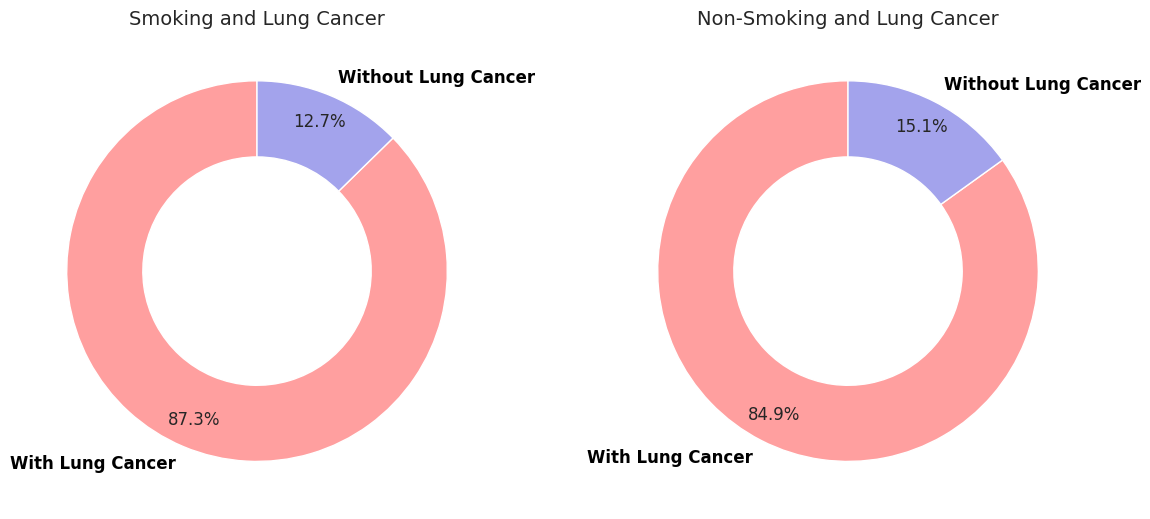

In [25]:
percentages1 = [sm1_percentage, sm2_percentage]
percentages2 = [sm3_percentage, sm4_percentage]
labels1 = ['With Lung Cancer', 'Without Lung Cancer']
labels2 = ['With Lung Cancer', 'Without Lung Cancer']
colors = ['#ff9f9f', '#a3a3ec']
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
wedges1, text1, autotext1 = axes[0].pie(
    percentages1, labels=labels1, autopct='%1.1f%%',
    startangle=90, pctdistance=0.85, colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='w')
)
center_circle1 = plt.Circle((0, 0), 0.3, fc='white')
axes[0].add_artist(center_circle1)
axes[0].set_title('Smoking and Lung Cancer', fontsize=14)
for t in text1:
    t.set(color='black', fontsize=12, fontweight='bold')
wedges2, text2, autotext2 = axes[1].pie(
    percentages2, labels=labels2, autopct='%1.1f%%',
    startangle=90, pctdistance=0.85, colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='w')
)
center_circle2 = plt.Circle((0, 0), 0.3, fc='white')
axes[1].add_artist(center_circle2)
axes[1].set_title('Non-Smoking and Lung Cancer', fontsize=14)
for t in text2:
    t.set(color='black', fontsize=12, fontweight='bold')
axes[0].set_aspect('equal')
axes[1].set_aspect('equal')
plt.tight_layout()
plt.show()



<div style="background-color:#FAF2D3; color:black; padding:20px; font-size:15px; text-align:left; border-radius:20px;"> 
Interpretation : 
People who smoke are slightly more likely in the risk of having lung cancer than the people who don't smoke and have lung cancer
</div>


<div style="background-color:gray; color:white; padding:15px; font-size:25px; font-family: sans-serif; text-align:left; border-radius:20px;">Alcohol consumption & Lung cancer
</div>


In [26]:
df_plot = df.copy()
df_plot['alcohol_consuming'] = df_plot['alcohol_consuming'].replace({1:"Yes",0:"No"})
fig = px.histogram(df_plot, x='alcohol_consuming', color='alcohol_consuming',
                   color_discrete_sequence={1: '#f59542', 0: '#f4e78b'},
                   labels={'alcohol_consuming': 'Alcohol Consumption'},
                   title='Distribution of Alcohol Consumption',
                   barmode='group')
fig.update_xaxes(categoryorder='array', categoryarray=['Yes', 'No'])
fig.show()


In [27]:
# People who consume alcohol and have lung cancer
alc1 = df[(df['alcohol_consuming'] == 1) & (df['lung_cancer'] == 1)]

# People who consume alcohol and don't have lung cancer
alc2 = df[(df['alcohol_consuming'] == 1) & (df['lung_cancer'] == 0)]

# People who don't consume alcohol and have lung cancer
alc3 = df[(df['alcohol_consuming'] == 0) & (df['lung_cancer'] == 1)]

# People who don't consume alcohol and don't have lung cancer
alc4 = df[(df['alcohol_consuming'] == 0) & (df['lung_cancer'] == 0)]

alc1_percentage = round((len(alc1) / len(df[df['alcohol_consuming'] == 1])) * 100,2)
alc2_percentage = round((len(alc2) / len(df[df['alcohol_consuming'] == 1])) * 100,2)
alc3_percentage = round((len(alc3) / len(df[df['alcohol_consuming'] == 0])) * 100,2)
alc4_percentage = round((len(alc4) / len(df[df['alcohol_consuming'] == 0])) * 100,2)

print(f"The percentage of people who consume alcohol and have lung cancer is {alc1_percentage:.2f}%")
print(f"The percentage of people who consume alcohol and don't have lung cancer is {alc2_percentage:.2f}%")
print(f"The percentage of people who don't consume alcohol and have lung cancer is {alc3_percentage:.2f}%")
print(f"The percentage of people who don't consume alcohol and don't have lung cancer is {alc4_percentage:.2f}%")


The percentage of people who consume alcohol and have lung cancer is 95.39%
The percentage of people who consume alcohol and don't have lung cancer is 4.61%
The percentage of people who don't consume alcohol and have lung cancer is 75.00%
The percentage of people who don't consume alcohol and don't have lung cancer is 25.00%


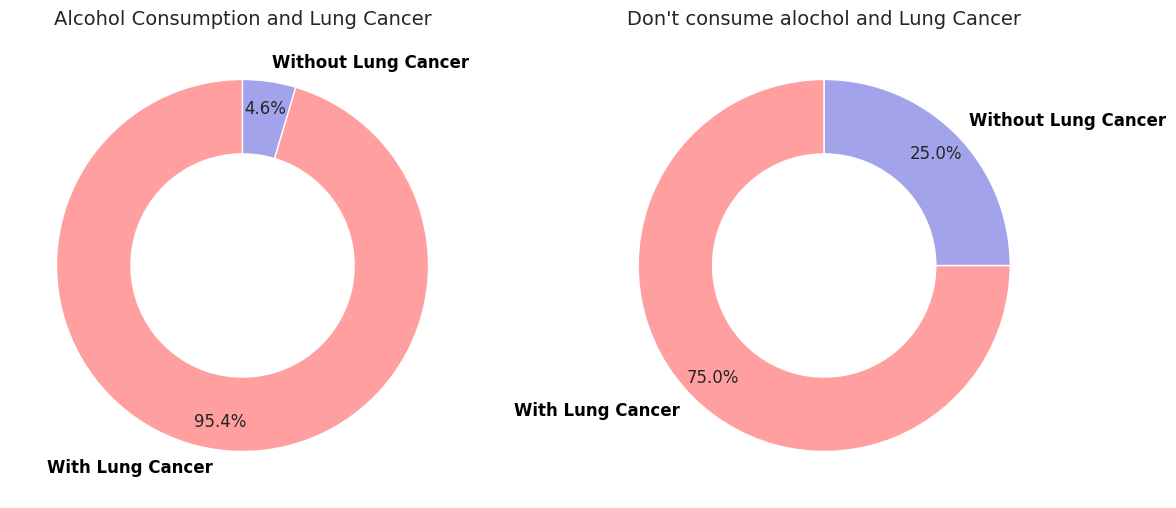

In [28]:
percentages1 = [alc1_percentage, alc2_percentage]
percentages2 = [alc3_percentage, alc4_percentage]
labels1 = ['With Lung Cancer', 'Without Lung Cancer']
labels2 = ['With Lung Cancer', 'Without Lung Cancer']
colors = ['#ff9f9f', '#a3a3ec']
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
wedges1, text1, autotext1 = axes[0].pie(
    percentages1, labels=labels1, autopct='%1.1f%%',
    startangle=90, pctdistance=0.85, colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='w')
)
center_circle1 = plt.Circle((0, 0), 0.3, fc='white')
axes[0].add_artist(center_circle1)
axes[0].set_title('Alcohol Consumption and Lung Cancer', fontsize=14)
for t in text1:
    t.set(color='black', fontsize=12, fontweight='bold')
wedges2, text2, autotext2 = axes[1].pie(
    percentages2, labels=labels2, autopct='%1.1f%%',
    startangle=90, pctdistance=0.85, colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='w')
)
center_circle2 = plt.Circle((0, 0), 0.3, fc='white')
axes[1].add_artist(center_circle2)
axes[1].set_title("Don't consume alochol and Lung Cancer", fontsize=14)
for t in text2:
    t.set(color='black', fontsize=12, fontweight='bold')
axes[0].set_aspect('equal')
axes[1].set_aspect('equal')
plt.tight_layout()
plt.show()


In [29]:
df_copy = df.copy()
df_copy['gender'] = df_copy['gender'].replace({1: "Male", 2: "Female"})
df_copy['alcohol_consuming'] = pd.to_numeric(df_copy['alcohol_consuming'])
df_copy['lung_cancer'] = pd.to_numeric(df_copy['lung_cancer'])
male_total = len(df_copy[df_copy['gender'] == "Male"])
female_total = len(df_copy[df_copy['gender'] == "Female"])
male_alc_lc = len(df_copy[(df_copy['gender'] == "Male") & (df_copy['lung_cancer'] == 1) & (df_copy['alcohol_consuming'] == 1)])
female_alc_lc = len(df_copy[(df_copy['gender'] == "Female") & (df_copy['lung_cancer'] == 1) & (df_copy['alcohol_consuming'] == 1)])
data = {
    'Gender': ['Male', 'Female'],
    'Total Population': [male_total, female_total],
    'Alcohol & Lung Cancer': [male_alc_lc, female_alc_lc],
    'Non-Alcohol & Lung Cancer': [male_total - male_alc_lc, female_total - female_alc_lc]
}
df_plot = pd.DataFrame(data)
fig = px.bar(df_plot, x='Gender', y=['Total Population', 'Alcohol & Lung Cancer', 'Non-Alcohol & Lung Cancer'],
             title='Population and Lung Cancer Cases by Gender and Alcohol Consumption',
             labels={'value': 'Count', 'variable': 'Category'},
             color_discrete_sequence=['#a3a3ec', '#ff9f9f', '#ffcccb'])
fig.update_layout(barmode='group')
fig.show()


**We aimed to determine if there is any relationship between alcohol consumption and presence lung cancer. Since both are categorical variables, we conducted a Chi-Square test of independence,a statistical method used to evaluate the associationship between two categorical variables. The test calculated a Chi-Square statistic and a corresponding p-value,measuring the difference between the expected and observed counts in the contingency table. To determine statistical significance, we establish a predefined significance level(alpha). If the p-value is less than alpha,we inferred a significant relationship between alcohol consumption and lung cancer. Conversely if p-value exceeds alpha then we can say that there is no sigicant relationship between alcohol consumption and lung cancer.**

In [30]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['alcohol_consuming'],df['lung_cancer'])
chi2,p,_,_, = chi2_contingency(contingency_table)
alpha=0.05 # considering 5% level of significance
if p<alpha:
    print("There is a significant relationship between alcohol consumption and lung cancer.")
else:
    print("There is  no significant relationship between alcohol consumption and lung cancer.")


There is a significant relationship between alcohol consumption and lung cancer.



<div style="background-color:#FAF2D3; color:black; padding:20px; font-size:15px; text-align:left; border-radius:20px;"> 
Interpretation : 
The analysis reveals a noteworthy association between alcohol consumption and lung cancer, with 95.4% of lung cancer cases occurring in individuals who consume alcohol. So people who consume are at high risk of having lung cancer
</div>


<div style="background-color:gray; color:white; padding:15px; font-size:25px; font-family: sans-serif; text-align:left; border-radius:20px;"> Chest pain & Lung cancer
</div>


In [31]:
df_copy = df.copy()
df_copy['chest_pain'] = df_copy['chest_pain'].replace({0: 'No', 1: 'Yes'})
fig = px.histogram(df_copy, x='chest_pain', color='chest_pain',
                   color_discrete_map={'Yes': '#f59542', 'No': '#f4e78b'},
                   labels={'chest_pain': 'Chest pain'},
                   title='Distribution of Chest pain')
fig.update_xaxes(categoryorder='array', categoryarray=['Yes', 'No'])
fig.update_layout(barmode='overlay')
fig.show()


In [32]:
contingency_table_alcohol = pd.crosstab(df['alcohol_consuming'], df['chest_pain'])
contingency_table_smoking = pd.crosstab(df['smoking'], df['chest_pain'])
chi2_alcohol, p_alcohol, _, _ = chi2_contingency(contingency_table_alcohol)
chi2_smoking, p_smoking, _, _ = chi2_contingency(contingency_table_smoking)
if p_alcohol < 0.05:
    print("There is a significant relationship between alcohol consumption and chest pain.")
else:
    print("There is no significant relationship between alcohol consumption and chest pain.")

if p_smoking < 0.05:
    print("There is a significant relationship between smoking and chest pain.")
else:
    print("There is no significant relationship between smoking and chest pain.")


There is a significant relationship between alcohol consumption and chest pain.
There is no significant relationship between smoking and chest pain.



<div style="background-color:#FAF2D3; color:black; padding:20px; font-size:15px; text-align:left; border-radius:20px;"> 
Interpretation : 
In other words, individuals who consume alcohol may be at a higher risk of experiencing chest pain. This chest pain, in certain instances, could potentially serve as an indicator or symptom of an underlying condition such as lung cancer</div>





<div style="background-color:gray; color:white; padding:15px; font-size:25px; font-family: sans-serif; text-align:left; border-radius:20px;"> Health-related factors & Lung cancer
</div>


**In this segment I am combining some of the variables of my dataset and naming it as health_factors in order to see the 
combined effect of these factors on lung cancer. The variables are yellow_fingers,chronic_disease,allergy,wheezing,coughing,shortness_of_breath and swallowing_difficulty**

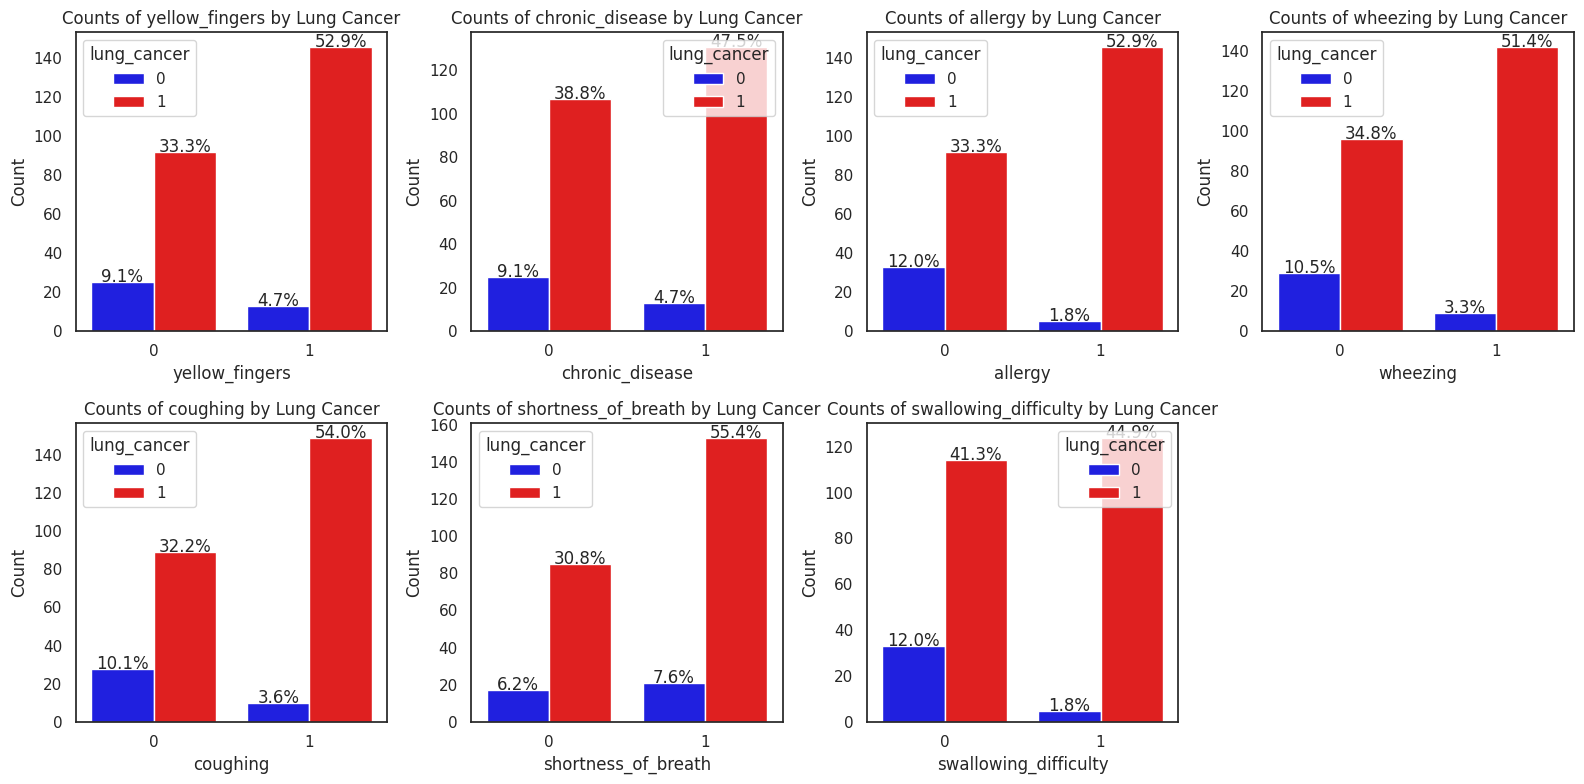

In [33]:
df_hf_copy = df.copy()
health_factors = ['yellow_fingers', 'chronic_disease', 'allergy', 'wheezing', 'coughing', 'shortness_of_breath', 'swallowing_difficulty']
plt.figure(figsize=(16, 8))
for i, factor in enumerate(health_factors):
    plt.subplot(2, 4, i + 1)
    df_copy[factor] = df_copy[factor].map({0: 'No', 1: 'Yes'})
    palette = ['blue','red']
    ax = sns.countplot(data=df_hf_copy, x=factor, hue='lung_cancer', palette=palette)
    plt.title(f'Counts of {factor} by Lung Cancer')
    plt.xlabel(factor)
    plt.ylabel('Count')
    total_count = len(df_hf_copy)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height/total_count*100:.1f}%', (p.get_x() + p.get_width() / 2., height), ha='center')
sns.set(rc={'legend.fontsize': 10})
plt.tight_layout()
plt.show()


In [34]:
contingency_table = pd.crosstab(df_hf_copy['yellow_fingers'] + df_hf_copy['chronic_disease'] + df_hf_copy['allergy'] + df_hf_copy['wheezing'] + df_hf_copy['coughing'] + df_hf_copy['shortness_of_breath'] + df_hf_copy['swallowing_difficulty'], df_hf_copy['lung_cancer'])
chi2, p, _, _ = chi2_contingency(contingency_table)
alpha = 0.05
if p < alpha:
    print("There is a significant relationship between health factors and lung cancer.")
else:
    print("There is no significant relationship between health factors and lung cancer.")


There is a significant relationship between health factors and lung cancer.


<a id="7"></a> <br>
# <div style="background-color:#000; color:cyan; padding:15px; font-size:25px; font-family: sans-serif; text-align:left; border-radius:20px;"> Handling Imbalanced Data
</div>

**As we can see our dataset is highly imbalanced consisting 238 samples (86% of total data) about individuals who have lung cancer and only 38 samples (14% of total data) about individuals who don't have lung cancer. So we will handle this imbalanced data by using oversampling techniques (RandomOverSampler and SMOTE).** 

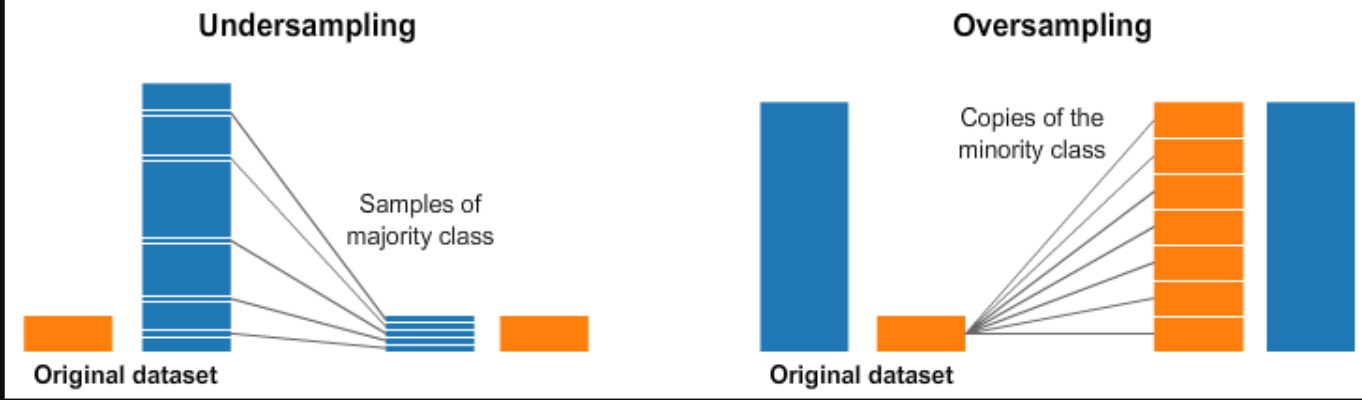





**SMOTE (Synthetic Minority Over-sampling Technique)**

SMOTE is designed to tackle the underrepresentation of the minority class. It achieves this by creating synthetic instances for the minority class. It identifies individual minority class samples and generates new synthetic examples by interpolating between these samples and their nearest neighbors. By doing so, SMOTE rebalances the class distribution, making it more equitable. This can be crucial because imbalanced datasets often lead to models favoring the majority class and yielding biased results. SMOTE helps mitigate this bias.


In [35]:
df = df.drop('age_cat',axis=1)

In [36]:
X = df.drop('lung_cancer',axis=1)
Y = df['lung_cancer']

In [37]:
oversample = RandomOverSampler(sampling_strategy='minority')
smote = SMOTE(sampling_strategy='minority')
X_resampled_over, Y_resampled_over = oversample.fit_resample(X, Y)
X_resampled_smote, Y_resampled_smote = smote.fit_resample(X, Y)
print("SMOTE:", Counter(Y_resampled_smote))


SMOTE: Counter({1: 238, 0: 238})


<a id="8"></a> <br>

# <div style="background-color:#000; color:cyan; padding:15px; font-size:25px; font-family: sans-serif; text-align:left; border-radius:20px;"> Modeling
</div>


**In this segment we will use 5 diffrent Machine Learning models(Logistic Regression,Random Forest,SVM,KNN & XGBoost) for prediction,several evaluation metrices and confusion matrix in order to compare which model performs better.**


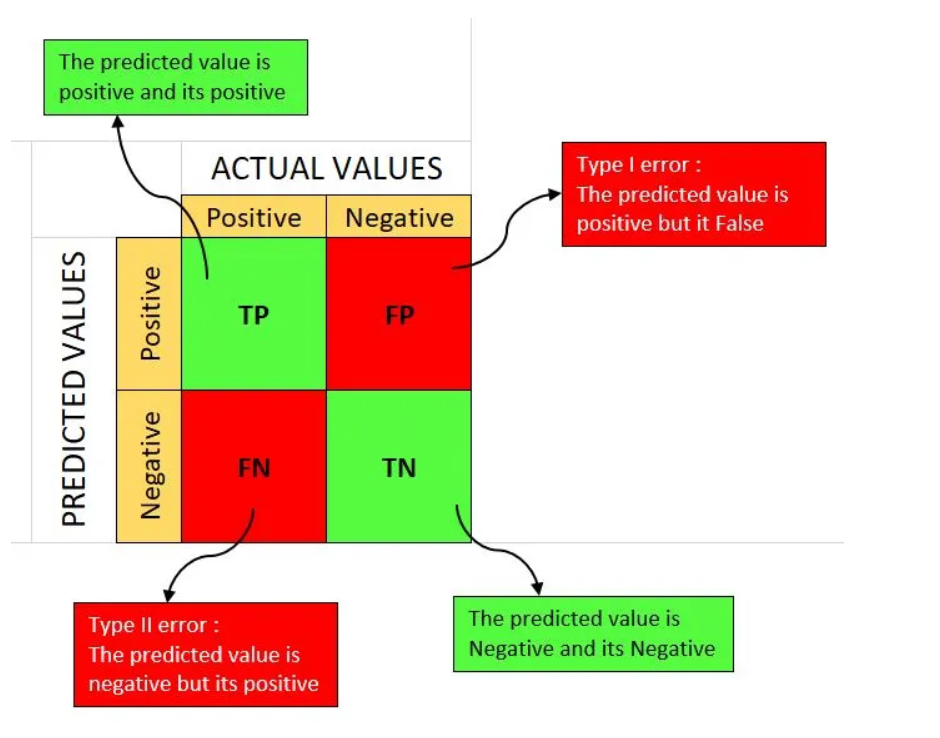

In [38]:
# Splitting the resampled dataset into train and test data

X_train_resampled, X_test_resampled, Y_train_resampled, Y_test_resampled = train_test_split(X_resampled_smote, Y_resampled_smote, test_size=0.2, random_state=42)

<div style="background-color:#AE445A; color:white; padding:15px; font-size:25px; font-family: sans-serif; text-align:left; border-radius:20px;"> Logistic Regression
</div>


Logistic Regression (with Resampled Data)
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        52
           1       0.98      0.95      0.97        44

    accuracy                           0.97        96
   macro avg       0.97      0.97      0.97        96
weighted avg       0.97      0.97      0.97        96

Confusion Matrix:
[[51  1]
 [ 2 42]]


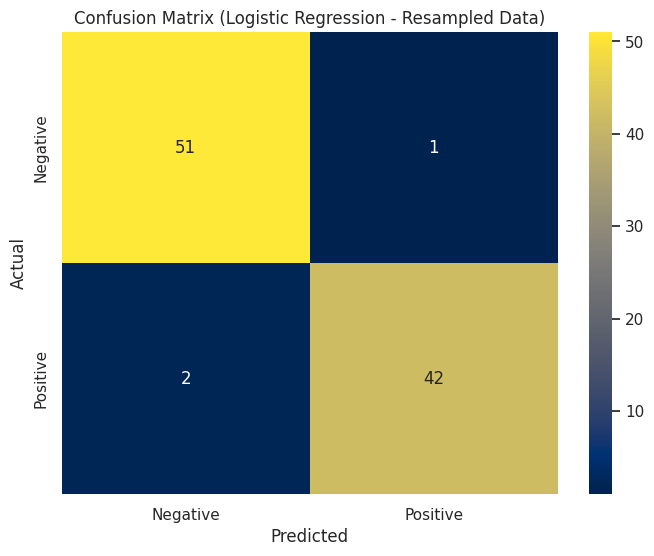

In [39]:
from sklearn.metrics import classification_report
logistic_model_resampled = LogisticRegression()
logistic_model_resampled.fit(X_train_resampled, Y_train_resampled)
logistic_y_pred_resampled = logistic_model_resampled.predict(X_test_resampled)
logistic_classification_rep_resampled = classification_report(Y_test_resampled, logistic_y_pred_resampled)
logistic_conf_matrix_resampled = confusion_matrix(Y_test_resampled, logistic_y_pred_resampled)
print("Logistic Regression (with Resampled Data)")
print("Classification Report:")
print(logistic_classification_rep_resampled)
print("Confusion Matrix:")
print(logistic_conf_matrix_resampled)
plt.figure(figsize=(8, 6))
sns.heatmap(logistic_conf_matrix_resampled, annot=True, fmt="d", cmap="cividis",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression - Resampled Data)')
plt.show()


<div style="background-color:#AE445A; color:white; padding:15px; font-size:25px; font-family: sans-serif; text-align:left; border-radius:20px;"> Random Forest
</div>


Random Forest (with Resampled Data)
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        52
           1       0.98      0.95      0.97        44

    accuracy                           0.97        96
   macro avg       0.97      0.97      0.97        96
weighted avg       0.97      0.97      0.97        96

Confusion Matrix:
[[51  1]
 [ 2 42]]


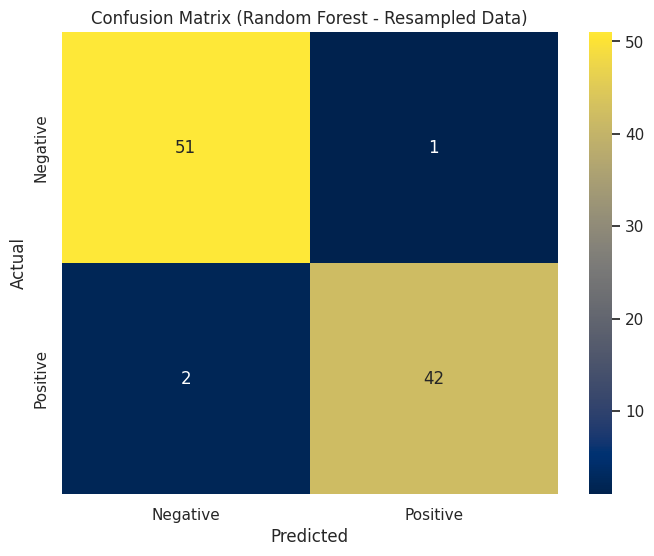

In [40]:
rf_model_resampled = RandomForestClassifier(n_estimators=100)
rf_model_resampled.fit(X_train_resampled, Y_train_resampled)
rf_y_pred_resampled = rf_model_resampled.predict(X_test_resampled)
rf_classification_rep_resampled = classification_report(Y_test_resampled, rf_y_pred_resampled)
rf_conf_matrix_resampled = confusion_matrix(Y_test_resampled, rf_y_pred_resampled)
print("Random Forest (with Resampled Data)")
print("Classification Report:")
print(rf_classification_rep_resampled)
print("Confusion Matrix:")
print(rf_conf_matrix_resampled)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix_resampled, annot=True, fmt="d", cmap="cividis",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest - Resampled Data)')
plt.show()


<div style="background-color:#AE445A; color:white; padding:15px; font-size:25px; font-family: sans-serif; text-align:left; border-radius:20px;"> Support Vector Machine (SVM)
</div>


Support Vector Machine (with Resampled Data)
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.71      0.70        52
           1       0.64      0.61      0.63        44

    accuracy                           0.67        96
   macro avg       0.66      0.66      0.66        96
weighted avg       0.67      0.67      0.67        96

Confusion Matrix:
[[37 15]
 [17 27]]


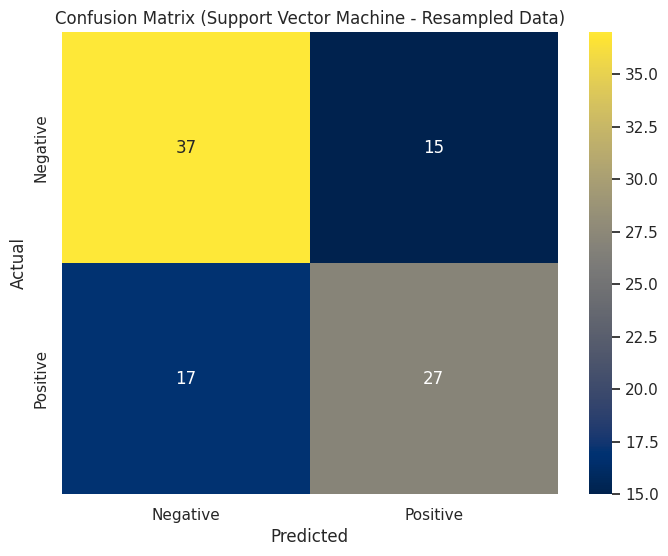

In [41]:
svm_model_resampled = SVC()
svm_model_resampled.fit(X_train_resampled, Y_train_resampled)
svm_y_pred_resampled = svm_model_resampled.predict(X_test_resampled)
svm_classification_rep_resampled = classification_report(Y_test_resampled, svm_y_pred_resampled)
svm_conf_matrix_resampled = confusion_matrix(Y_test_resampled, svm_y_pred_resampled)
print("Support Vector Machine (with Resampled Data)")
print("Classification Report:")
print(svm_classification_rep_resampled)
print("Confusion Matrix:")
print(svm_conf_matrix_resampled)

plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix_resampled, annot=True, fmt="d", cmap="cividis",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Support Vector Machine - Resampled Data)')
plt.show()


<div style="background-color:#AE445A; color:white; padding:15px; font-size:25px; font-family: sans-serif; text-align:left; border-radius:20px;"> K-Nearest Neighbors (KNN)
</div>


K-Nearest Neighbors (with Resampled Data)
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        52
           1       0.91      0.93      0.92        44

    accuracy                           0.93        96
   macro avg       0.93      0.93      0.93        96
weighted avg       0.93      0.93      0.93        96

Confusion Matrix:
[[48  4]
 [ 3 41]]


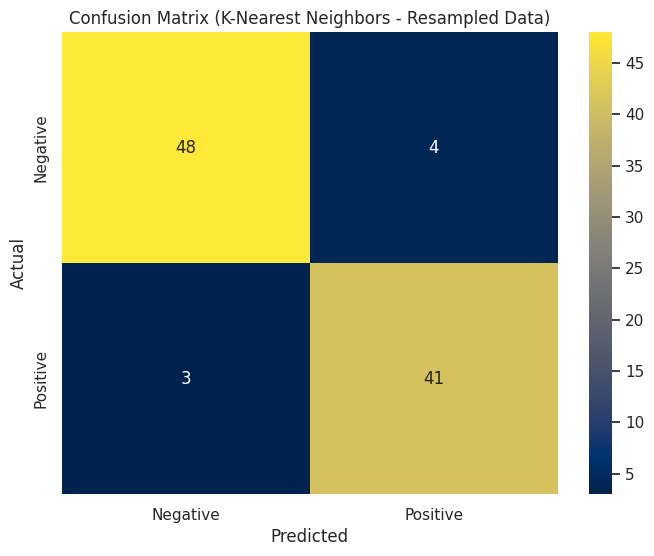

In [42]:
knn_model_resampled = KNeighborsClassifier()
knn_model_resampled.fit(X_train_resampled, Y_train_resampled)
knn_y_pred_resampled = knn_model_resampled.predict(X_test_resampled)
knn_classification_rep_resampled = classification_report(Y_test_resampled, knn_y_pred_resampled)
knn_conf_matrix_resampled = confusion_matrix(Y_test_resampled, knn_y_pred_resampled)
print("K-Nearest Neighbors (with Resampled Data)")
print("Classification Report:")
print(knn_classification_rep_resampled)
print("Confusion Matrix:")
print(knn_conf_matrix_resampled)
plt.figure(figsize=(8, 6))
sns.heatmap(knn_conf_matrix_resampled, annot=True, fmt="d", cmap="cividis",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (K-Nearest Neighbors - Resampled Data)')
plt.show()


<div style="background-color:#AE445A; color:white; padding:15px; font-size:25px; font-family: sans-serif; text-align:left; border-radius:20px;"> XGBoost
</div>


XGBoost (with Resampled Data)
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        52
           1       0.95      0.95      0.95        44

    accuracy                           0.96        96
   macro avg       0.96      0.96      0.96        96
weighted avg       0.96      0.96      0.96        96

Confusion Matrix:
[[50  2]
 [ 2 42]]


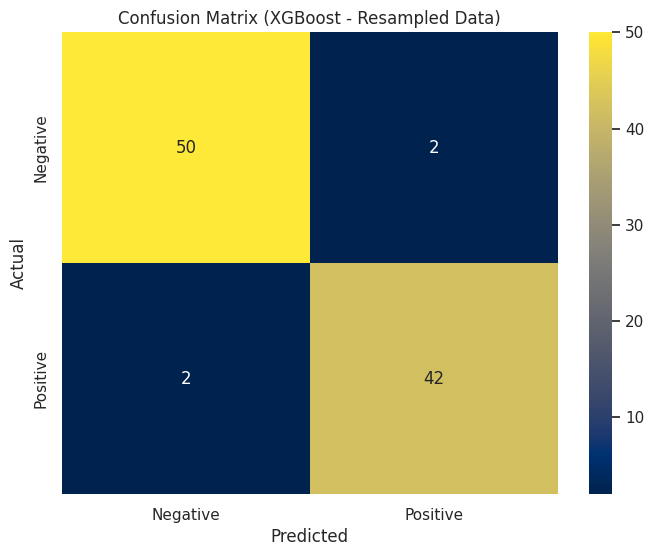

In [43]:
xgb_model_resampled = XGBClassifier()
xgb_model_resampled.fit(X_train_resampled, Y_train_resampled)
xgb_y_pred_resampled = xgb_model_resampled.predict(X_test_resampled)
xgb_classification_rep_resampled = classification_report(Y_test_resampled, xgb_y_pred_resampled)
xgb_conf_matrix_resampled = confusion_matrix(Y_test_resampled, xgb_y_pred_resampled)
print("XGBoost (with Resampled Data)")
print("Classification Report:")
print(xgb_classification_rep_resampled)
print("Confusion Matrix:")
print(xgb_conf_matrix_resampled)
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_conf_matrix_resampled, annot=True, fmt="d", cmap="cividis",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (XGBoost - Resampled Data)')
plt.show()


<a id="9"></a> <br>

# <div style="background-color:#000; color:cyan; padding:15px; font-size:25px; font-family: sans-serif; text-align:left; border-radius:20px;"> Findings / Insights
</div>



<div style="background-color:#ffcc00; color:#333; padding:15px; font-size:14px; font-weight:bold; text-align:left; border-radius:70px;"> 
 
*  95.4% of lung cancer cases occurring in individuals who consume alcohol. So people who consume are at high risk of having lung cancer indicating the significant relationship between Alcohol consumption and Lung Cancer.

    
*  People who smoke are slightly more likely in the risk of having lung cancer than the people who don't smoke and have lung cancer.

* Individuals who consume alcohol may be at a higher risk of experiencing chest pain. This chest pain, in certain instances, could potentially serve as an indicator or symptom of an underlying condition such as lung cancer.

</div>


**That's a wrap!**

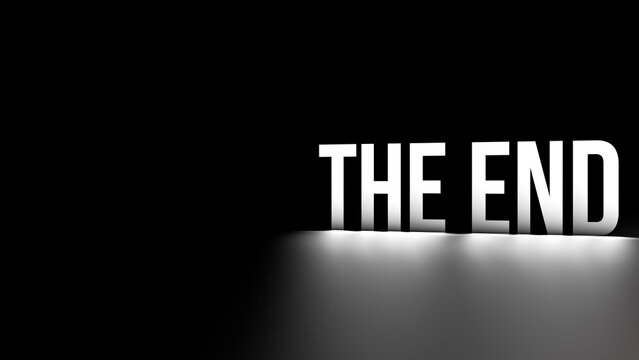

## Table of Contents
1. [Introduction](#1.-Introduction)
2. [Data Preprocessing](#2.-Data-Preprocessing)
3. [Exploratory Data Analysis](#3.-Exploratory-Data-Analysis)
4. [Feature Engineering](#4.-Feature-Engineering)
5. [Model Building](#5.-Model-Building)
6. [Model Evaluation](#6.-Model-Evaluation)
7. [Conclusion](#7.-Conclusion)
